<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/main/Zemlyakov%20Serj/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_1_%D0%9F%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Работа с массивами данных
import numpy as np 

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

!pip install tensorflow-addons

import tensorflow_addons as tfa

from tensorflow_addons.metrics import F1Score

%matplotlib inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 5.3 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
# Mount Google Drive
import os
from google.colab import drive

drive.mount('/content/drive')
!pwd
!ls



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
drive  sample_data


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/internsheep1/profpat_1.csv')
# df

<ipython-input-2-fc7b980cb21a>:2: DtypeWarning: Columns (24,25,26,43,44,45,46,47,48,54,55,56,57,58,59,60,61,62,63,64,65,77,78,79,81,84,85,86,87,88,89,90,91,92,108,109,112,113,120,121,122,123,124,125,126,127,162,163,164,168,169,170,171,172,173,174,195,196,201,202,203,204,205,206,207,208,221,222,223,228,229,230,252,253,258,259,260,261,262,263,264,265,266,267,270,271,272,273,276,277,278,279,282,283,284,285,286,287,293,294,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,363,364,365,366,367,370,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,418,419,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,470,471,472,483,484,485,486,491,492,514,515,549,550,551,552,553,554,555,564,565,578,579,580,581,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,6

In [ ]:
# Вывод количества и числа признаков
print(df.shape)

(1982, 4587)


In [ ]:
dffix1 = df.dropna(axis=1, how='all')

# Вывод количества и числа признаков
print(dffix1.shape)


(1982, 3703)


In [ ]:
# dffix1.to_excel('ppfix1.xlsx', index=False)

In [ ]:
dffix2 = dffix1[dffix1['ЗаключениеМК'].isin(['Годен',
                                    'ГоденСКоррекциейЗрения',
                                    'ВременноНегоден',
                                    'НуждаетсяВДообследованииИЛечении',
                                    'ОграниченноГоден',
                                    'ГоденБезРаботНаВысотах'])]
print(dffix2.shape)                                    

(1571, 3703)


In [ ]:
dffix2.loc[dffix2['ЗаключениеМК'] == 'ВременноНегоден', 'ЗаключениеМК'] = 'Негоден'
dffix2.loc[dffix2['ЗаключениеМК'] == 'НуждаетсяВДообследованииИЛечении', 'ЗаключениеМК'] = 'Негоден'
dffix2.loc[dffix2['ЗаключениеМК'] == 'ГоденСКоррекциейЗрения', 'ЗаключениеМК'] = 'ОграниченноГоден'
dffix2.loc[dffix2['ЗаключениеМК'] == 'ГоденБезРаботНаВысотах', 'ЗаключениеМК'] = 'ОграниченноГоден'

In [ ]:
dffix2.ЗаключениеМК[:500].value_counts()

Годен               443
ОграниченноГоден     51
Негоден               6
Name: ЗаключениеМК, dtype: int64

In [ ]:
# dffix2.to_excel('ppfix2.xlsx', index=False)

In [ ]:
dffix2.rename(columns = {'Вредные Факторы':'Вредность'}, inplace = True )

<ipython-input-9-81fbedcc2c8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix2.rename(columns = {'Вредные Факторы':'Вредность'}, inplace = True )


In [ ]:
dffix2.columns.tolist()

['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'Диспансерная Группа',
 'ДиспансернаяГруппаПредставление',
 'Вредность',
 'ЛабораторныеИсследования1_ДокументПрием',
 'ЛабораторныеИсследования1_ДатаПриема',
 'ЛабораторныеИсследования1_Салон',
 'ЛабораторныеИсследования1_СалонПредставление',
 'ЛабораторныеИсследования1_Специализация',
 'ЛабораторныеИсследования1_СпециализацияПредставление',
 'ЛабораторныеИсследования1_ХР_Рекомендация1',
 'ЛабораторныеИсследования1_ХР_Рекомендация1Представление',
 'ЛабораторныеИсследования1_ХР_Рекомендация2',
 'ЛабораторныеИсследования1_ОАК_Значение',
 'ЛабораторныеИсследования1_ОАК_ЗначениеПредставление',
 'ЛабораторныеИсследования1_Биохимия_Значение',
 'ЛабораторныеИсследования1_Биохимия_Зна

In [ ]:
dffix4_simple = dffix2[['ЗаключениеМК',
                        'КлиентДатаРождения',
                        'Профессия',
                        'Вредность',
 'Психиатрия Наркология1 МКБ101',
#  'Психиатрия Наркология1 Диагноз Представление1',
 'Офтальмология1_МКБ101',
#  'Офтальмология1_ДиагнозПредставление1',
 'Оториноларингология1_МКБ101',
#  'Оториноларингология1_ДиагнозПредставление1',
 'Гинекология1_МКБ101',
#  'Гинекология1_ДиагнозПредставление1',
 'Стоматология1_МКБ101',
#  'Стоматология1_ДиагнозПредставление1',
 'Дерматовенерология1_МКБ101',
#  'Дерматовенерология1_ДиагнозПредставление1',
 'Неврология1_МКБ101',
#  'Неврология1_ДиагнозПредставление1',
 'Терапия1_МКБ101',
#  'Терапия1_ДиагнозПредставление1',
 'Хирургия1_МКБ101',
#  'Хирургия1_ДиагнозПредставление1',
 'Офтальмология1_МКБ102',
#  'Офтальмология1_ДиагнозПредставление2',
 'Терапия2_МКБ101',
#  'Терапия2_ДиагнозПредставление1',
]]

print (dffix4_simple.shape)

(1571, 15)


In [ ]:
dffix4_simple.to_excel('ppfix4.xlsx', index=False)

In [ ]:
pd.options.display.max_columns = None
dffix4_simple


,ЗаключениеМК,КлиентДатаРождения,Профессия,Вредность,Психиатрия Наркология1 МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Терапия1_МКБ101,Хирургия1_МКБ101,Офтальмология1_МКБ102,Терапия2_МКБ101
0,Годен,10/24/76 0:00,Ведущий специалист по организации обуения,11.4,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Годен,11/18/87 0:00,Ведущий специалист,4.2.5,Z00.0,Z00.0,NaN,NaN,NaN,Z00.0,Z00.0,I11.9,NaN,NaN,NaN
2,ОграниченноГоден,9/8/85 0:00,Главный менеджер,4.2.5,Z00.0,H52.1,NaN,NaN,NaN,Z00.0,NaN,Z00.0,NaN,NaN,NaN
3,Годен,4/25/88 0:00,Главный специалист,11.1,NaN,Z00.0,Z00.0,NaN,Z00.0,NaN,Z00.0,Z00.0,NaN,NaN,NaN
4,ОграниченноГоден,4/17/84 0:00,Старший специалист,11.1,NaN,H52.2,Z00.0,NaN,Z00.0,NaN,Z00.0,Z00.0,Z00.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Годен,12/29/93 0:00,Инженер,"4.4,4.5,6.1",Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,Z00.0,Z00.0,Z00.0,NaN,NaN
1962,Годен,7/10/89 0:00,Начальник лаборатории,4.4,Z00.0,NaN,Z00.0,NaN,NaN,NaN,Z00.0,Z00.0,NaN,NaN,NaN
1972,Годен,2/4/87 0:00,"Инженер по бурению 1 категории, непосредственн...",3.1.8.2,Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,Z00.0,Z00.0,Z00.0,NaN,NaN
1973,Годен,2/4/93 0:00,Приемщик вагонов в депо,"4.2.5,6.1",Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,Z00.0,Z00.0,Z00.0,NaN,NaN


In [ ]:

# concatenating the columns
dffix4_simple['Свод_МКБ'] = (dffix4_simple['Психиатрия Наркология1 МКБ101'].map(str) + ','
 + dffix4_simple['Офтальмология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Оториноларингология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Гинекология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Стоматология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Дерматовенерология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Неврология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Терапия1_МКБ101'].map(str)+ ','
 + dffix4_simple['Хирургия1_МКБ101'].map(str)+ ','
 + dffix4_simple['Офтальмология1_МКБ102'].map(str)+ ','
 + dffix4_simple['Терапия2_МКБ101'].map(str))
 



<ipython-input-62-faf34a43eb90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix4_simple['Свод_МКБ'] = (dffix4_simple['Психиатрия Наркология1 МКБ101'].map(str) + ','


In [ ]:
dffix5_simple = dffix4_simple[['ЗаключениеМК',
                        'КлиентДатаРождения',
                        'Профессия',
                        'Вредность',
                        'Свод_МКБ',
]]

print (dffix5_simple.shape)
dffix5_simple

(1571, 5)


,ЗаключениеМК,КлиентДатаРождения,Профессия,Вредность,Свод_МКБ
0,Годен,10/24/76 0:00,Ведущий специалист по организации обуения,11.4,"Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan,nan,nan,..."
1,Годен,11/18/87 0:00,Ведущий специалист,4.2.5,"Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,I11.9,nan,..."
2,ОграниченноГоден,9/8/85 0:00,Главный менеджер,4.2.5,"Z00.0,H52.1,nan,nan,nan,Z00.0,nan,Z00.0,nan,na..."
3,Годен,4/25/88 0:00,Главный специалист,11.1,"nan,Z00.0,Z00.0,nan,Z00.0,nan,Z00.0,Z00.0,nan,..."
4,ОграниченноГоден,4/17/84 0:00,Старший специалист,11.1,"nan,H52.2,Z00.0,nan,Z00.0,nan,Z00.0,Z00.0,Z00...."
...,...,...,...,...,...
1961,Годен,12/29/93 0:00,Инженер,"4.4,4.5,6.1","Z00.0,Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00...."
1962,Годен,7/10/89 0:00,Начальник лаборатории,4.4,"Z00.0,nan,Z00.0,nan,nan,nan,Z00.0,Z00.0,nan,na..."
1972,Годен,2/4/87 0:00,"Инженер по бурению 1 категории, непосредственн...",3.1.8.2,"Z00.0,Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00...."
1973,Годен,2/4/93 0:00,Приемщик вагонов в депо,"4.2.5,6.1","Z00.0,Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00...."


In [ ]:
dffix5_simple.loc[dffix5_simple['ЗаключениеМК'] == 'Негоден', 'ЗаключениеМК'] = 0 
dffix5_simple.loc[dffix5_simple['ЗаключениеМК'] == 'ОграниченноГоден', 'ЗаключениеМК'] = 1
dffix5_simple.loc[dffix5_simple['ЗаключениеМК'] == 'Годен', 'ЗаключениеМК'] = 2

<ipython-input-64-bf05980aa8e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix5_simple.loc[dffix5_simple['ЗаключениеМК'] == 'Негоден', 'ЗаключениеМК'] = 0
<ipython-input-64-bf05980aa8e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix5_simple.loc[dffix5_simple['ЗаключениеМК'] == 'ОграниченноГоден', 'ЗаключениеМК'] = 1
<ipython-input-64-bf05980aa8e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix5_simple.loc[dffix

In [ ]:
# Настройка номеров столбцов
# Дальнейшие вычисления не будут зависеть от порядка столбцов в таблице

COL_DB    = dffix5_simple.columns.get_loc('КлиентДатаРождения')
COL_MKB    = dffix5_simple.columns.get_loc('Свод_МКБ')
COL_HARM   = dffix5_simple.columns.get_loc('Вредность')
COL_PROF   = dffix5_simple.columns.get_loc('Профессия')


CLASS_COUNT = dffix5_simple['ЗаключениеМК'].nunique()
CLASS_LIST = dffix5_simple.ЗаключениеМК.value_counts()
print (CLASS_LIST)

# Список порогов возраста
age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

2    1434
1     126
0      11
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Вычисление счетчиков для данных разбиения
for class_desc in [age_class]:
                  
    if isinstance(class_desc[1], list):
        class_desc[0] = len(class_desc[1]) + 1
    else:
        class_desc[0] = max(class_desc[1].values()) + 1

In [ ]:
age_class

[11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

In [ ]:
# Функция извлечения даты рождения

def extract_DB(row_list):
    result = []
    
    # Для всех строк таблицы: собрать значения 
    # столбцов профессии
   
    
    for row in row_list:
                    result.append(str(row[COL_DB]))
    
    # Возврат в виде массива
    return result

In [ ]:
# Извлечение даты рождения для выборки
DB_list = extract_DB(dffix5_simple.values) 

# Пример текста о профессии из резюме
print(dffix5_simple.values[120])
print(DB_list[120]) 
print (DB_list)

[1 '11/10/94 0:00' 'Геофизик полевого вычислительного центра 1 категории'
 '11.1,4.2.5'
 'Z00.0,H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,K81.9,Z00.0,nan,nan']
11/10/94 0:00
['10/24/76 0:00', '11/18/87 0:00', '9/8/85 0:00', '4/25/88 0:00', '4/17/84 0:00', '8/28/94 0:00', '2/13/86 0:00', '5/27/94 0:00', '2/5/79 0:00', '4/20/89 0:00', '3/2/92 0:00', '5/21/75 0:00', '4/1/89 0:00', '1/11/91 0:00', '7/20/85 0:00', '1/9/98 0:00', '2/21/59 0:00', '8/30/82 0:00', '6/26/82 0:00', '1/3/89 0:00', '6/16/71 0:00', '9/16/89 0:00', '6/6/84 0:00', '3/5/72 0:00', '9/16/88 0:00', '5/26/02 0:00', '6/17/74 0:00', '3/16/68 0:00', '6/8/64 0:00', '2/15/79 0:00', '3/27/83 0:00', '11/19/70 0:00', '1/18/64 0:00', '8/27/60 0:00', '3/30/72 0:00', '8/4/68 0:00', '7/12/57 0:00', '7/1/75 0:00', '6/21/90 0:00', '4/20/87 0:00', '1/20/75 0:00', '4/27/95 0:00', '12/1/71 0:00', '1/8/68 0:00', '2/25/85 0:00', '5/7/91 0:00', '5/6/81 0:00', '7/7/87 0:00', '7/2/96 0:00', '9/20/84 0:00', '7/8/82 0:00', '12/19/93 0:00', '9/15/87 0:0

In [ ]:
def extract_age(x):
    try: 
        return 2023-(1900+int(re.search(r'(\d{1,2})\/(\d{1,2})\/(\d{2})', x)[3]))   # Ожидается строка вида 'mm/dd/yyyy ...'
  
    except (IndexError, TypeError, ValueError):
        return 0   

def int_to_ohe(arg, class_list):
  
    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

 # Преобразование значения возраста в one hot encoding

def age_years_to_ohe(arg):
    return int_to_ohe(arg, age_class)   


In [ ]:
print (extract_age(DB_list[120]))
# print (int_to_ohe(29, age_class))
print (age_years_to_ohe(extract_age(DB_list[120])))

29
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
x_train_age_01 = np.zeros ((len(dffix5_simple), age_class[0]))
print (x_train_age_01.shape)

(1571, 11)


In [ ]:
# Преобразование последовательностей индексов 
for A in range(len(DB_list)):
  # print (age_years_to_ohe(extract_age(A)))
  x_train_age_01[A,:] = np.array(age_years_to_ohe(extract_age(DB_list[A])))
  # i+=1
  # print (i)
# Проверка результата
print(x_train_age_01.shape)
# Проверка результата
print(x_train_age_01[11])

(1571, 11)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Функция извлечения данных о профессии

def extract_prof_text(row_list):
    result = []
    
    # Для всех строк таблицы: собрать значения 
    # столбцов профессии
   
    
    for row in row_list:
                    result.append(str(row[COL_PROF]))
    
    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о вредных факторах

def extract_harm_text(row_list):
    result = []
    
    # Для всех строк таблицы: собрать значения 
    # столбцов вредности
   
    
    for row in row_list:
                    result.append(str(row[COL_HARM]).split(','))
    
    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о МКБ

def extract_MKB_text(row_list):
    result = []
    
    # Для всех строк таблицы: собрать значения сводного МКБ
   
    
    for row in row_list:
                    result.append(str(row[COL_MKB]).split(','))
    
    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о МКБ

def extract_Diag_text(row_list):
    result = []
    
    # Для всех строк таблицы: собрать значения сводного МКБ
   
    
    for row in row_list:
                    result.append(str(row[COL_DIAG]).split(','))
    
    # Возврат в виде массива
    return result

In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=3000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы 
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_harm = Tokenizer(num_words=3000, # объем словаря
                      filters='!"#$%&()*+,-–—/:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы 
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_MKB = Tokenizer(num_words=3000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы 
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_Diag = Tokenizer(num_words=1000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы 
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Извлечение текстов о профессии для выборки
prof_text = extract_prof_text(dffix5_simple.values) 

# Пример текста о профессии из резюме
print(dffix5_simple.values[120])
print(prof_text[120]) 

[1 '11/10/94 0:00' 'Геофизик полевого вычислительного центра 1 категории'
 '11.1,4.2.5'
 'Z00.0,H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,K81.9,Z00.0,nan,nan']
Геофизик полевого вычислительного центра 1 категории


In [ ]:
dffix5_simple.Профессия.value_counts()

Ведущий агроном                           44
Инженер                                   37
Старший специалист                        34
Ведущий специалист                        32
Водитель автомобиля                       26
                                          ..
Слесарь-сборщик/водитель (смежная)         1
Слесарь КИПиА                              1
Мастер по капитальному ремонту скважин     1
Слесарь/водитель (смежная)                 1
Анестезиолог                               1
Name: Профессия, Length: 557, dtype: int64

In [ ]:
tokenizer.fit_on_texts(prof_text)
items = list(tokenizer.word_index.items())       # Получение индексов слов
print(items[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items))              # Длина словаря

[('unknown', 1), ('инженер', 2), ('по', 3), ('водитель', 4), ('специалист', 5), ('ведущий', 6), ('разряда', 7), ('и', 8), ('слесарь', 9), ('старший', 10), ('категории', 11), ('начальник', 12), ('ремонту', 13), ('агроном', 14), ('машинист', 15), ('главный', 16), ('6', 17), ('автомобиля', 18), ('обслуживанию', 19), ('5', 20), ('охранник', 21), ('менеджер', 22), ('продавец', 23), ('отдела', 24), ('1', 25), ('электрооборудования', 26), ('проектировщик', 27), ('оператор', 28), ('2', 29), ('повар', 30), ('монтажник', 31), ('3', 32), ('электромонтер', 33), ('уборщик', 34), ('работ', 35), ('помещений', 36), ('производственных', 37), ('технологических', 38), ('сервис', 39), ('кассир', 40), ('класс', 41), ('наладчик', 42), ('с', 43), ('служебных', 44), ('механосборочных', 45), ('пид', 46), ('электромонтажник', 47), ('4', 48), ('комплектовщик', 49), ('тренер', 50)]
Размер словаря 517


In [ ]:
# Преобразование текстов в последовательность индексов согласно частотному словарю
prof_seq = tokenizer.texts_to_sequences(prof_text)

In [ ]:
# Преобразование последовательностей индексов в bag of words
x_train_prof_01 = tokenizer.sequences_to_matrix(prof_seq)

In [ ]:
# Проверка результата
print(x_train_prof_01.shape)

(1571, 3000)


In [ ]:
# Проверка получившихся данных
n = 1054
print(prof_text[n])                       # Профессия в тексте
print(prof_seq[n])                        # Профессия в индексах слов
print(x_train_prof_01[n][0:100])          # Профессия в bag of words

Начальник участка по обслуживанию сетей
[12, 84, 3, 19, 144]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Извлечение текстов о вредности для выборки
harm_text = extract_harm_text(dffix5_simple.values) 

# Пример текста о вредности из резюме
print(dffix5_simple.values[1054])
print(harm_text[1054]) 

[2 '9/9/78 0:00' 'Начальник участка по обслуживанию сетей' '6.1,9,6.1,9'
 'nan,Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0']
['6.1', '9', '6.1', '9']


In [ ]:
tokenizer_harm.fit_on_texts(harm_text)
items_harm = list(tokenizer_harm.word_index.items())       # Получение индексов слов
print(items_harm[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items_harm))              # Длина словаря

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq = tokenizer_harm.texts_to_sequences(harm_text)

# Преобразование последовательностей индексов в bag of words
x_train_harm_01 = tokenizer_harm.sequences_to_matrix(harm_seq)

# Проверка результата
print(x_train_harm_01.shape)

# Проверка получившихся данных
n = 1
print(harm_text[n])                       # Вредность в тексте
print(harm_seq[n])                        # Вредность в индексах слов
print(x_train_harm_01[n][0:100])          # Вредность в bag of words

[('unknown', 1), ('6.1', 2), ('4.4', 3), ('5.1', 4), ('4.2.5', 5), ('11.1', 6), ('18.1', 7), ('23', 8), ('9', 9), ('6.2', 10), ('18.2', 11), ('1.50', 12), ('15', 13), ('11.4', 14), ('4.3.2', 15), ('6', 16), ('4.7', 17), ('25', 18), ('4.1', 19), ('1.30.1', 20), ('1.1', 21), ('4.3.1', 22), ('11.3', 23), ('1.14.2', 24), ('4.8', 25), ('1.37.1', 26), ('1.29.2', 27), ('1.8.1.1', 28), ('27', 29), ('1.34.1', 30), ('17', 31), ('3.1.7', 32), ('4.5', 33), ('22', 34), ('18', 35), ('12', 36), ('1.36.1', 37), ('1.19.1', 38), ('8', 39), ('1.3', 40), ('1.29.1', 41), ('13', 42), ('1.8.1.2', 43), ('1.39', 44), ('4.2.1', 45), ('3.4', 46), ('1.8.2.1', 47), ('4.6', 48), ('11', 49), ('1.18.3', 50)]
Размер словаря 92
(1571, 3000)
['4.2.5']
[5]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
dffix5_simple.Вредность.value_counts()

23                                   178
4.2.5                                106
25,25                                 40
27                                    37
11.1                                  36
                                    ... 
4.3.1,4.4,6.1,11.1,18.1                1
4.4,11.1,11.4,18                       1
1.3,1.14.2,1.50,5.1,6.1,11.1,18.1      1
11.1,11.4                              1
4.2.5,6.1                              1
Name: Вредность, Length: 388, dtype: int64

In [ ]:
# Извлечение текстов о МКБ
MKB_text = extract_MKB_text(dffix5_simple.values) 

# Пример текста о вредности из резюме
print(dffix5_simple.values[102])
print(MKB_text[102]) 

[2 '1/4/60 0:00' 'Главный специалист' '1.14.1,1.50'
 'nan,Z00.0,Z00.0,D25,nan,nan,Z00.0,Z00.0,Z00.0,nan,nan']
['nan', 'Z00.0', 'Z00.0', 'D25', 'nan', 'nan', 'Z00.0', 'Z00.0', 'Z00.0', 'nan', 'nan']


In [ ]:
tokenizer_MKB.fit_on_texts(MKB_text)
items_MKB = list(tokenizer_MKB.word_index.items())       # Получение индексов слов
print(items_MKB[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items_MKB))              # Длина словаря

[('unknown', 1), ('nan', 2), ('z00.0', 3), ('i11.9', 4), ('h52.1', 5), ('h52.2', 6), ('h52.0', 7), ('k29.3', 8), ('h53.0', 9), ('g90.8', 10), ('h25.0', 11), ('h91.1', 12), ('r25.1', 13), ('h74.1', 14), ('i67.2', 15), ('k40.9', 16), ('t94.0', 17), ('h90.4', 18), ('h47.2', 19), ('m42.1', 20), ('d25', 21), ('e11.8', 22), ('k29.7', 23), ('h90.3', 24), ('k29.6', 25), ('k86.1', 26), ('l40.0', 27), ('i83.9', 28), ('d25.9', 29), ('f06.6', 30), ('h50.9', 31), ('k29.8', 32), ('h02.4', 33), ('e11.9', 34), ('t90.4', 35), ('i25.9', 36), ('n60.2', 37), ('h11.0', 38), ('q12.0', 39), ('i67.9', 40), ('j33.0', 41), ('j30.1', 42), ('h25.1', 43), ('k29.4', 44), ('i70', 45), ('h90.5', 46), ('g90.9', 47), ('s68.2', 48), ('i69.4', 49), ('n83.2', 50)]
Размер словаря 75


In [ ]:
# Преобразование текстов в последовательность индексов согласно частотному словарю
MKB_seq = tokenizer_MKB.texts_to_sequences(MKB_text)

# Преобразование последовательностей индексов в bag of words
x_train_MKB_01 = tokenizer_MKB.sequences_to_matrix(MKB_seq)

# Проверка результата
print(x_train_MKB_01.shape)

# Проверка получившихся данных
n = 1
print(MKB_text[n])                       # МКБ в тексте
print(MKB_seq[n])                        # МКБ в индексах слов
print(x_train_MKB_01[n][0:100])          # МКБ в bag of words

(1571, 3000)
['Z00.0', 'Z00.0', 'nan', 'nan', 'nan', 'Z00.0', 'Z00.0', 'I11.9', 'nan', 'nan', 'nan']
[3, 3, 2, 2, 2, 3, 3, 4, 2, 2, 2]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
dffix5_simple.Свод_МКБ.value_counts()

nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan                    151
Z00.0,Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00.0,nan,nan         84
Z00.0,Z00.0,Z00.0,nan,nan,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan       64
Z00.0,nan,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan,nan       45
Z00.0,nan,Z00.0,Z00.0,nan,Z00.0,Z00.0,Z00.0,nan,nan,nan         39
                                                              ... 
Z00.0,H52.2,Z00.0,nan,nan,nan,Z00.0,I11.9,nan,nan,nan            1
Z00.0,H52.2,Z00.0,nan,Z00.0,Z00.0,Z00.0,K29.8,Z00.0,nan,nan      1
Z00.0,H52.2,Z00.0,nan,nan,Z00.0,Z00.0,Z00.0,Z00.0,H53.0,nan      1
Z00.0,nan,nan,nan,nan,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan            1
Z00.0,H52.1,Z00.0,nan,nan,nan,Z00.0,nan,Z00.0,nan,nan            1
Name: Свод_МКБ, Length: 510, dtype: int64

In [ ]:
# выделение признаков и целевой переменной
X = dffix5_simple.drop('ЗаключениеМК', axis=1)
Y = dffix5_simple['ЗаключениеМК']

In [ ]:
y_data = np.array(Y)            # Перевод общего списка меток класса в numpy-массив

print(f'Общий массив меток классов следующей формы: {y_data.shape}')
print (y_data)

y_train = utils.to_categorical(y_data, CLASS_COUNT)

Общий массив меток классов следующей формы: (1571,)
[2 2 1 ... 2 2 2]


In [ ]:
input1 = Input((x_train_age_01.shape[1],))
input2 = Input((x_train_prof_01.shape[1],))
input3 = Input((x_train_harm_01.shape[1],))
input4 = Input((x_train_MKB_01.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(2**11, activation="relu")(x1)
x1 = Dense(1024, activation="relu")(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(3000, activation="relu")(x2)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(128, activation="relu")(x2)

x3 = input3                               # Ветка 3
x3 = Dense(3000, activation="relu")(x3)
x3 = Dense(512, activation="relu")(x3)
x3 = Dropout(0.3)(x3)
x3 = Dense(128, activation="relu")(x3)

x4 = input4                               # Ветка 4
x4 = Dense(3000, activation="relu")(x4)
x4 = Dense(512, activation="relu")(x4)
x4 = Dropout(0.3)(x4)
x4 = Dense(128, activation="relu")(x4)

x = concatenate([x1, x2, x3, x4])             # Объединение 4 веток

x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.3)(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_final = Model((input1, input2, input3, input4), x)

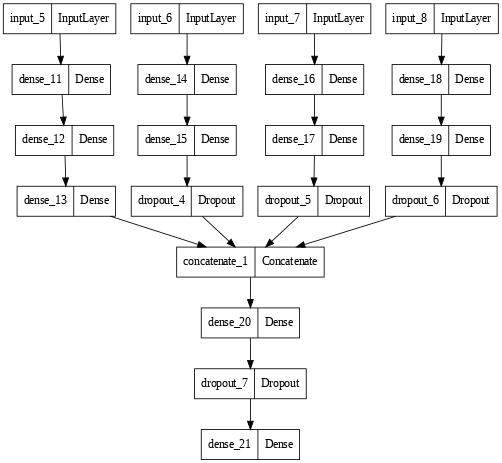

In [ ]:
utils.plot_model(model_final, dpi=60)

In [ ]:
model_final.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 3000)]       0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 3000)]       0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 3000)]       0           []                               
                                                                                            

In [ ]:
custum_metric = tfa.metrics.F1Score(num_classes=3, average="micro", threshold=0.5, name='F1Score' )

Epoch 1/5
37/37 [==============================] - 24s 567ms/step - loss: 0.1563 - F1Score: 0.9349 - val_loss: 0.2735 - val_F1Score: 0.9262
Epoch 2/5
37/37 [==============================] - 22s 585ms/step - loss: 0.1576 - F1Score: 0.9387 - val_loss: 0.2747 - val_F1Score: 0.9248
Epoch 3/5
37/37 [==============================] - 20s 544ms/step - loss: 0.1542 - F1Score: 0.9323 - val_loss: 0.2768 - val_F1Score: 0.9237
Epoch 4/5
37/37 [==============================] - 22s 599ms/step - loss: 0.1551 - F1Score: 0.9408 - val_loss: 0.2806 - val_F1Score: 0.9248
Epoch 5/5
37/37 [==============================] - 20s 545ms/step - loss: 0.1542 - F1Score: 0.9386 - val_loss: 0.2810 - val_F1Score: 0.9223


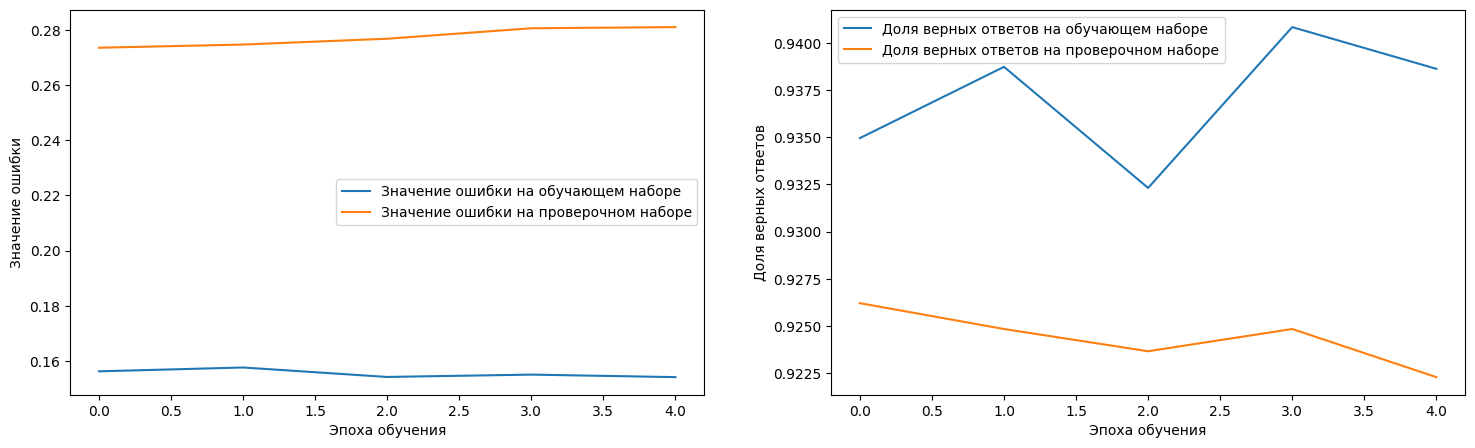

In [ ]:
model_final.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=[custum_metric])

history = model_final.fit([x_train_age_01, x_train_prof_01, x_train_harm_01, x_train_MKB_01], 
                           y_train,
                           shuffle=True,
                           batch_size=32, 
                           epochs=5, 
                           validation_split=0.25,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['F1Score'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_F1Score'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
# Функция оценки результатов и вывода оценки

def eval_net(model, x_train, y_train, y_scaler = None, n = 500, limit = 3.):
  
    pred = model.predict(x_train)             # Предсказание на тренировочной выборке
    if y_scaler:                              # Если есть нормирование - то денормировать
        pred = y_scaler.inverse_transform(pred)

    print('Средняя абсолютная ошибка:', mean_absolute_error(pred, y_train), '\n')

    for i in range(n):
        print('Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(y_train[i, 0],
                                                                                                    pred[i, 0],
                                                                                                    abs(y_train[i, 0] - pred[i, 0])))
    # Построение картинки разброса предсказанных и верных значений зарплаты
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(y_train, pred)                 # Отрисовка точечного графика
    ax.set_xlim(0, limit)                     # Пределы по x, y
    ax.set_ylim(0, limit)
    ax.plot(plt.xlim(), plt.ylim(), 'r')      # Отрисовка диагональной линии
    plt.xlabel('Правильные значения')
    plt.ylabel('Предсказания')
    plt.grid()
    plt.show()        

50/50 [==============================] - 3s 63ms/step
Средняя абсолютная ошибка: 0.062890165 

Реальное значение:   0.00  Предсказанное значение:   0.00  Разница:   0.00
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.03  Разница:   0.03
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.00  Разница:   0.00
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реаль

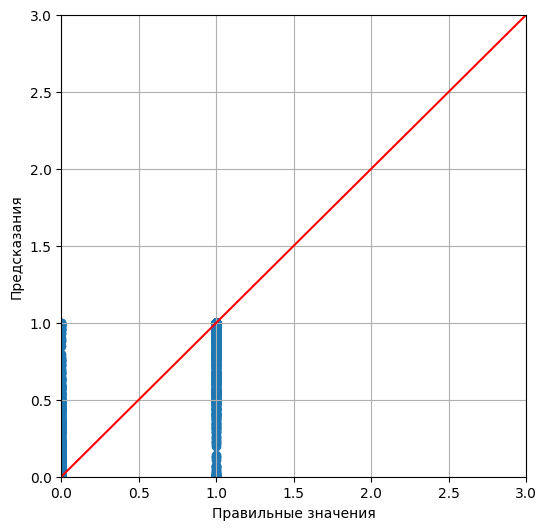

In [ ]:
eval_net(model_final, [x_train_age_01, x_train_prof_01, x_train_harm_01, x_train_MKB_01], 
                           y_train)

In [ ]:
dffix6_simple = dffix5_simple[:500]
print (dffix6_simple.shape)
dffix6_simple.ЗаключениеМК[:500].value_counts()

(500, 5)


2    443
1     51
0      6
Name: ЗаключениеМК, dtype: int64

In [ ]:
COL_DB    = dffix6_simple.columns.get_loc('КлиентДатаРождения')
COL_MKB    = dffix6_simple.columns.get_loc('Свод_МКБ')
COL_HARM   = dffix6_simple.columns.get_loc('Вредность')
COL_PROF   = dffix6_simple.columns.get_loc('Профессия')


CLASS_COUNT = dffix6_simple['ЗаключениеМК'].nunique()
CLASS_LIST = dffix6_simple.ЗаключениеМК.value_counts()
print (CLASS_LIST)


2    443
1     51
0      6
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Извлечение даты рождения для выборки
DB_list_2 = extract_DB(dffix6_simple.values) 

x_train_age_02 = np.zeros ((len(dffix6_simple), age_class[0]))

# Преобразование последовательностей индексов 
for A in range(len(DB_list_2)):
  # print (age_years_to_ohe(extract_age(A)))
  x_train_age_02[A,:] = np.array(age_years_to_ohe(extract_age(DB_list_2[A])))

In [ ]:
# Извлечение текстов о профессии для выборки
prof_text_2 = extract_prof_text(dffix6_simple.values) 

tokenizer.fit_on_texts(prof_text_2)
items = list(tokenizer.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
prof_seq_2 = tokenizer.texts_to_sequences(prof_text_2)

# Преобразование последовательностей индексов в bag of words
x_train_prof_02 = tokenizer.sequences_to_matrix(prof_seq_2)

In [ ]:
# Извлечение текстов о вредности для выборки
harm_text_2 = extract_harm_text(dffix6_simple.values) 

tokenizer.fit_on_texts(harm_text_2)
items_harm = list(tokenizer.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq_2 = tokenizer.texts_to_sequences(harm_text_2)

# Преобразование последовательностей индексов в bag of words
x_train_harm_02 = tokenizer.sequences_to_matrix(harm_seq_2)

In [ ]:
# Извлечение текстов о МКБ для выборки
MKB_text_2 = extract_MKB_text(dffix6_simple.values) 

tokenizer.fit_on_texts(MKB_text_2)
items_MKB = list(tokenizer.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
MKB_seq_2 = tokenizer.texts_to_sequences(MKB_text_2)

# Преобразование последовательностей индексов в bag of words
x_train_MKB_02 = tokenizer.sequences_to_matrix(MKB_seq_2)

In [ ]:
y_data_02 = np.array(dffix6_simple['ЗаключениеМК'])            # Перевод общего списка меток класса в numpy-массив

y_train_02 = utils.to_categorical(y_data_02, CLASS_COUNT)

In [ ]:
input1 = Input((x_train_age_02.shape[1],))
input2 = Input((x_train_prof_02.shape[1],))
input3 = Input((x_train_harm_02.shape[1],))
input4 = Input((x_train_MKB_02.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(2**11, activation="relu")(x1)
x1 = Dense(1024, activation="relu")(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(3000, activation="relu")(x2)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(128, activation="relu")(x2)

x3 = input3                               # Ветка 3
x3 = Dense(3000, activation="relu")(x3)
x3 = Dense(512, activation="relu")(x3)
x3 = Dropout(0.3)(x3)
x3 = Dense(128, activation="relu")(x3)

x4 = input4                               # Ветка 4
x4 = Dense(3000, activation="relu")(x4)
x4 = Dense(512, activation="relu")(x4)
x4 = Dropout(0.3)(x4)
x4 = Dense(128, activation="relu")(x4)

x = concatenate([x1, x2, x3, x4])             # Объединение 4 веток

x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.3)(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_final_2 = Model((input1, input2, input3, input4), x)

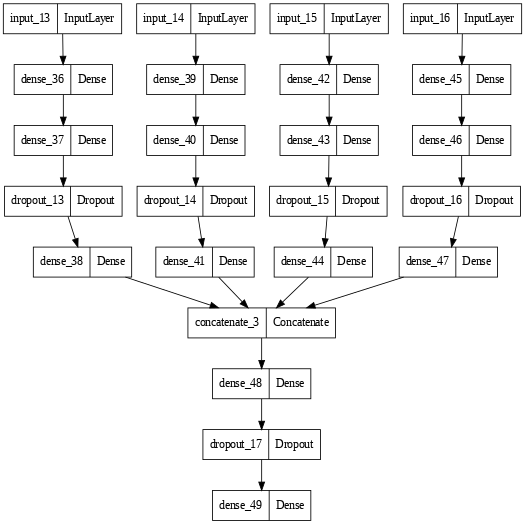

In [ ]:
utils.plot_model(model_final_2, dpi=60)

In [ ]:
model_final_2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 11)]         0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 3000)]       0           []                               
                                                                                                  
 input_15 (InputLayer)          [(None, 3000)]       0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 3000)]       0           []                               
                                                                                            

Epoch 1/20
24/24 [==============================] - 18s 659ms/step - loss: 0.7472 - F1Score: 0.5753 - val_loss: 0.7325 - val_F1Score: 0.8720
Epoch 2/20
24/24 [==============================] - 13s 544ms/step - loss: 0.6880 - F1Score: 0.8480 - val_loss: 0.6697 - val_F1Score: 0.8720
Epoch 3/20
24/24 [==============================] - 13s 534ms/step - loss: 0.6198 - F1Score: 0.8829 - val_loss: 0.6162 - val_F1Score: 0.8720
Epoch 4/20
24/24 [==============================] - 14s 572ms/step - loss: 0.5595 - F1Score: 0.8904 - val_loss: 0.5670 - val_F1Score: 0.8720
Epoch 5/20
24/24 [==============================] - 12s 522ms/step - loss: 0.5092 - F1Score: 0.8907 - val_loss: 0.5292 - val_F1Score: 0.8720
Epoch 6/20
24/24 [==============================] - 13s 537ms/step - loss: 0.4743 - F1Score: 0.8907 - val_loss: 0.5032 - val_F1Score: 0.8720
Epoch 7/20
24/24 [==============================] - 13s 528ms/step - loss: 0.4484 - F1Score: 0.8907 - val_loss: 0.4864 - val_F1Score: 0.8720
Epoch 8/20
24

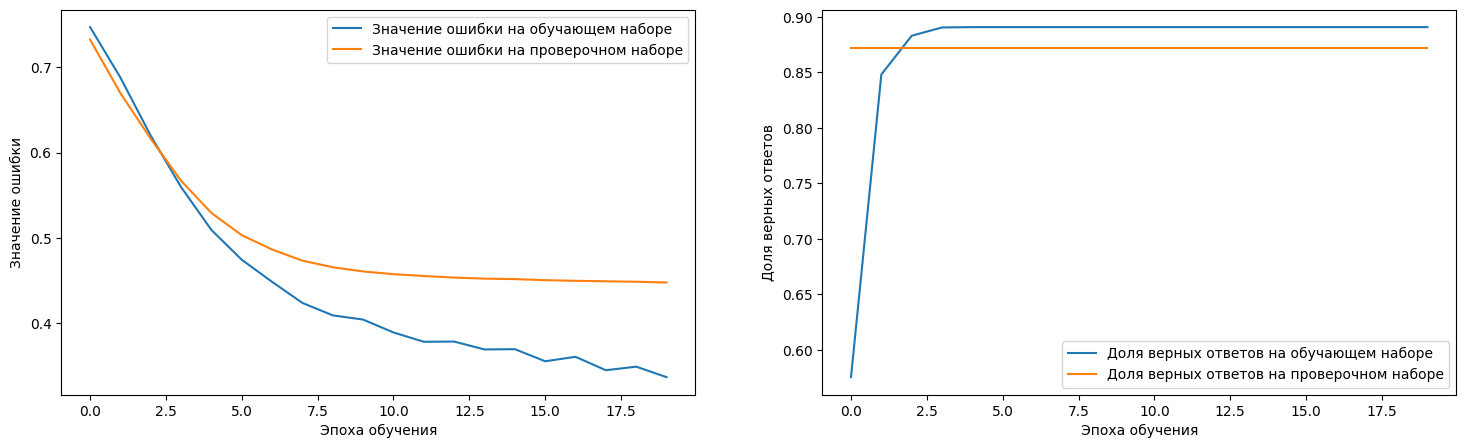

In [ ]:
model_final_2.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=[custum_metric])

history = model_final_2.fit([x_train_age_02, x_train_prof_02, x_train_harm_02, x_train_MKB_02], 
                           y_train_02,
                           shuffle=True,
                           batch_size=16, 
                           epochs=20, 
                           validation_split=0.25,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['F1Score'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_F1Score'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

16/16 [==============================] - 2s 140ms/step
Средняя абсолютная ошибка: 0.12773715 

Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.03  Разница:   0.03
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реаль

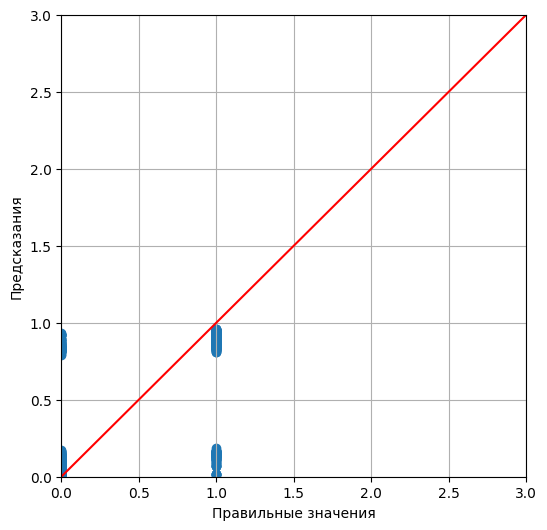

In [ ]:
eval_net(model_final_2, [x_train_age_02, x_train_prof_02, x_train_harm_02, x_train_MKB_02], 
                           y_train_02)

In [ ]:
dffix7 = dffix2[['ЗаключениеМК',
'Вредность',
'Психиатрия Наркология1 Диагноз Представление1',
'Офтальмология1_ДиагнозПредставление1',
'Оториноларингология1_ДиагнозПредставление1',
'Гинекология1_ДиагнозПредставление1',
'Стоматология1_ДиагнозПредставление1',
'Дерматовенерология1_ДиагнозПредставление1',
'Неврология1_ДиагнозПредставление1',
'Терапия1_ДиагнозПредставление1',
'Хирургия1_ДиагнозПредставление1',
'Офтальмология1_ДиагнозПредставление2',
'Терапия2_ДиагнозПредставление1',
]]

print (dffix7.shape)

(1571, 13)


In [ ]:
# Обобщенный диагноз
dffix7['Свод_Диагноз'] = (dffix7['Психиатрия Наркология1 Диагноз Представление1'].map(str) + ','
 + dffix7['Офтальмология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Оториноларингология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Гинекология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Стоматология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Дерматовенерология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Неврология1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Терапия1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Хирургия1_ДиагнозПредставление1'].map(str)+ ','
 + dffix7['Офтальмология1_ДиагнозПредставление2'].map(str)+ ','
 + dffix7['Терапия2_ДиагнозПредставление1'].map(str))

<ipython-input-11-6df66ed6385d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix7['Свод_Диагноз'] = (dffix7['Психиатрия Наркология1 Диагноз Представление1'].map(str) + ','


In [ ]:
dffix7_simple = dffix7[['ЗаключениеМК',
                        'Вредность',
                        'Свод_Диагноз',
]]

print (dffix7_simple.shape)
dffix7_simple

(1571, 3)


,ЗаключениеМК,Вредность,Свод_Диагноз
0,Годен,11.4,"Общий медицинский осмотр,Общий медицинский осм..."
1,Годен,4.2.5,"Общий медицинский осмотр,Общий медицинский осм..."
2,ОграниченноГоден,4.2.5,"Общий медицинский осмотр,Миопия,nan,nan,nan,Об..."
3,Годен,11.1,"nan,Общий медицинский осмотр,Общий медицинский..."
4,ОграниченноГоден,11.1,"nan,Астигматизм,Общий медицинский осмотр,nan,О..."
...,...,...,...
1961,Годен,"4.4,4.5,6.1","Общий медицинский осмотр,Общий медицинский осм..."
1962,Годен,4.4,"Общий медицинский осмотр,nan,Общий медицинский..."
1972,Годен,3.1.8.2,"Общий медицинский осмотр,Общий медицинский осм..."
1973,Годен,"4.2.5,6.1","Общий медицинский осмотр,Общий медицинский осм..."


In [ ]:
dffix7_simple.to_excel('ppfix7.xlsx', index=False)

In [ ]:
# Настройка номеров столбцов

CLASS_DICT ={'Негоден':0, 'ОграниченноГоден':1, 'Годен':2}

COL_DIAG    = dffix7_simple.columns.get_loc('Свод_Диагноз')
COL_HARM   = dffix7_simple.columns.get_loc('Вредность')
CLASS_COUNT = dffix7_simple['ЗаключениеМК'].nunique()
CLASS_LIST = dffix7_simple.ЗаключениеМК.value_counts()
print (CLASS_LIST)

Годен               1434
ОграниченноГоден     126
Негоден               11
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Извлечение текстов о вредности для выборки
harm_text_3 = extract_harm_text(dffix7_simple.values) 

tokenizer.fit_on_texts(harm_text_3)
items_harm = list(tokenizer.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq_3 = tokenizer.texts_to_sequences(harm_text_3)

# Преобразование последовательностей индексов в bag of words
x_train_harm_03 = tokenizer.sequences_to_matrix(harm_seq_3)

In [ ]:
# Извлечение текстов о сводном диагнозе для выборки
Diag_text_3 = extract_Diag_text(dffix7_simple.values) 

tokenizer.fit_on_texts(Diag_text_3)
items_Diag = list(tokenizer.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
Diag_seq_3 = tokenizer.texts_to_sequences(Diag_text_3)

# Преобразование последовательностей индексов в bag of words
x_train_Diag_03 = tokenizer.sequences_to_matrix(Diag_seq_3)

NameError: ignored

In [ ]:
# Пример текста о вредности и диагнозе
print(dffix7_simple.values[151])
print(Diag_text_3[151])

[1 '11.1'
 'Общий медицинский осмотр,Гиперметропия,Пресбиакузис,nan,Общий медицинский осмотр,nan,Общий медицинский осмотр,Другие хронические панкреатиты,Общий медицинский осмотр,nan,nan']
['Общий медицинский осмотр', 'Гиперметропия', 'Пресбиакузис', 'nan', 'Общий медицинский осмотр', 'nan', 'Общий медицинский осмотр', 'Другие хронические панкреатиты', 'Общий медицинский осмотр', 'nan', 'nan']


In [ ]:

y_list_key = list(dffix7_simple.ЗаключениеМК.values)
# print (CLASS_DICT.get(list(dffix7_simple.ЗаключениеМК.values)))
print (y_list_key)
# print (CLASS_DICT['Негоден'])
y_list = []
for CD in y_list_key:
  y_list.append(CLASS_DICT[CD])
print (y_list)

y_data_03 = np.array(y_list)            # Перевод общего списка меток класса в numpy-массив

y_train_03 = utils.to_categorical(y_data_03, CLASS_COUNT)

print (y_data_03[100])
print (y_train_03[100])

y = np.argmax(y_train_03, axis=-1)
print (y[100])


['Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'ОграниченноГоден', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Огран

In [ ]:
input1 = Input((x_train_harm_03.shape[1],))
input2 = Input((x_train_Diag_03.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(92, activation="relu")(x1)
x1 = Dense(512, activation="relu")(x1)
x1 = Dropout(0.2)(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(128, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(75, activation="relu")(x2)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.3)(x2)
x2 = BatchNormalization()(x2)
x2 = Dense(128, activation="relu")(x2)

x = concatenate([x1, x2])             # Объединение 4 веток

x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.1)(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_3 = Model((input1, input2), x)

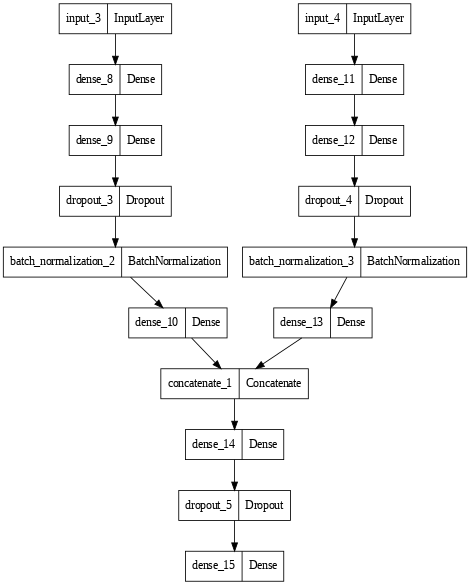

In [ ]:
utils.plot_model(model_3, dpi=60)

In [ ]:
model_3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 3000)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3000)]       0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 92)           276092      ['input_3[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 75)           225075      ['input_4[0][0]']                
                                                                                            

Epoch 1/50
550/550 [==============================] - 9s 12ms/step - loss: 0.2523 - F1Score: 0.9068 - val_loss: 0.2492 - val_F1Score: 0.9131
Epoch 2/50
550/550 [==============================] - 8s 15ms/step - loss: 0.2399 - F1Score: 0.9118 - val_loss: 0.2554 - val_F1Score: 0.9131
Epoch 3/50
550/550 [==============================] - 6s 12ms/step - loss: 0.2397 - F1Score: 0.9119 - val_loss: 0.2584 - val_F1Score: 0.9131
Epoch 4/50
550/550 [==============================] - 8s 15ms/step - loss: 0.2435 - F1Score: 0.9111 - val_loss: 0.2624 - val_F1Score: 0.9131
Epoch 5/50
550/550 [==============================] - 7s 12ms/step - loss: 0.2120 - F1Score: 0.9143 - val_loss: 0.2671 - val_F1Score: 0.9110
Epoch 6/50
550/550 [==============================] - 8s 15ms/step - loss: 0.2138 - F1Score: 0.9158 - val_loss: 0.2703 - val_F1Score: 0.9099
Epoch 7/50
550/550 [==============================] - 6s 11ms/step - loss: 0.2337 - F1Score: 0.9185 - val_loss: 0.2692 - val_F1Score: 0.9110
Epoch 8/50
55

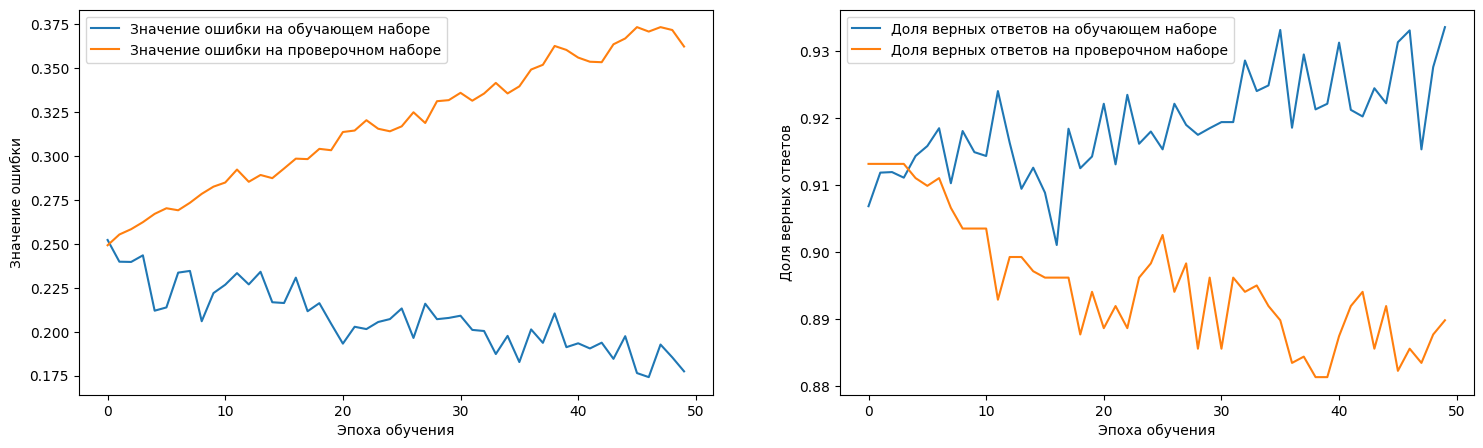

In [ ]:
model_3.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=[custum_metric])

history = model_3.fit([x_train_harm_03, x_train_Diag_03], 
                           y_train_03,
                           shuffle=True,
                           batch_size=2, 
                           epochs=50, 
                           validation_split=0.3,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['F1Score'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_F1Score'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

50/50 [==============================] - 0s 6ms/step
Средняя абсолютная ошибка: 0.07199739 

Реальное значение:   0.00  Предсказанное значение:   0.00  Разница:   0.00
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.00  Разница:   0.00
Реальное значение:   0.00  Предсказанное значение:   0.00  Разница:   0.00
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.00  Разница:   0.00
Реальное значение:   0.00  Предсказанное значение:   0.00  Разница:   0.00
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.00  Разница:   0.00
Реально

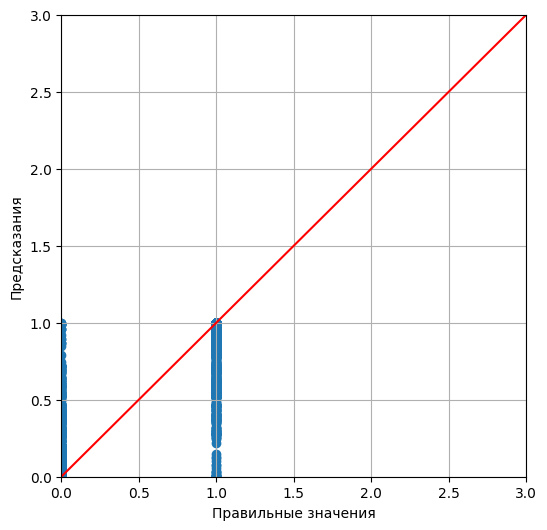

In [ ]:
eval_net(model_3, [x_train_harm_03, x_train_Diag_03], 
                           y_train_03)

In [ ]:
n=900
y_pred = model_3.predict([x_train_harm_03, x_train_Diag_03])
print ('Предсказанный вектор: ', y_pred[n])
print ('Реальный вектор: ', y_train_03[n])

y = np.argmax(y_pred, axis=-1)
print ('Предсказанный класс: ', y[n])
print ('Реальный класс: ', y_data_03[n])

50/50 [==============================] - 1s 9ms/step
Предсказанный вектор:  [0.00098457 0.6552795  0.3437358 ]
Реальный вектор:  [0. 0. 1.]
Предсказанный класс:  1
Реальный класс:  2


In [ ]:
dffix7_simple[dffix7_simple['ЗаключениеМК'].isin(['Негоден'])]

,ЗаключениеМК,Вредность,Свод_Диагноз
177,Негоден,"18.2,18.1,1.1,1.39,1.50,4.3.2,5.1,11.1,11.3,11.4","Общий медицинский осмотр,Последствия травмы гл..."
182,Негоден,"11.1,18.1","Общий медицинский осмотр,Общий медицинский осм..."
375,Негоден,"6.2,4.1,6.2,4.1","Общий медицинский осмотр,Гиперметропия,Общий м..."
388,Негоден,"4.1,6.2,18.1,18.2,4.1,6.2,18.1,18.2","Общий медицинский осмотр,Косоглазие неуточненн..."
396,Негоден,"4.1,6.2,18.1,18.2,4.1,6.2,18.1,18.2","Общий медицинский осмотр,Косоглазие неуточненн..."
479,Негоден,"1.14.2,1.23,3.1.7","Общий медицинский осмотр,Миопия,nan,Общий меди..."
978,Негоден,"4.4,6.1,11","Общий медицинский осмотр,Общий медицинский осм..."
1228,Негоден,"6.1,9,6.1,9","nan,Общий медицинский осмотр,Общий медицинский..."
1752,Негоден,"1.50,4.3.2,4.4,18.1,18.2","Общий медицинский осмотр,Гиперметропия,Общий м..."
1764,Негоден,"1.50,4.3.1,4.3.2,4.4,11.1,18","Общий медицинский осмотр,Гиперметропия,Общий м..."


In [ ]:
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        # print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
        #                                                                        100. * cm[cls, cls_pred],
        #                                                                        class_labels[cls_pred],
        #                                                                        msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

50/50 [==============================] - 0s 6ms/step


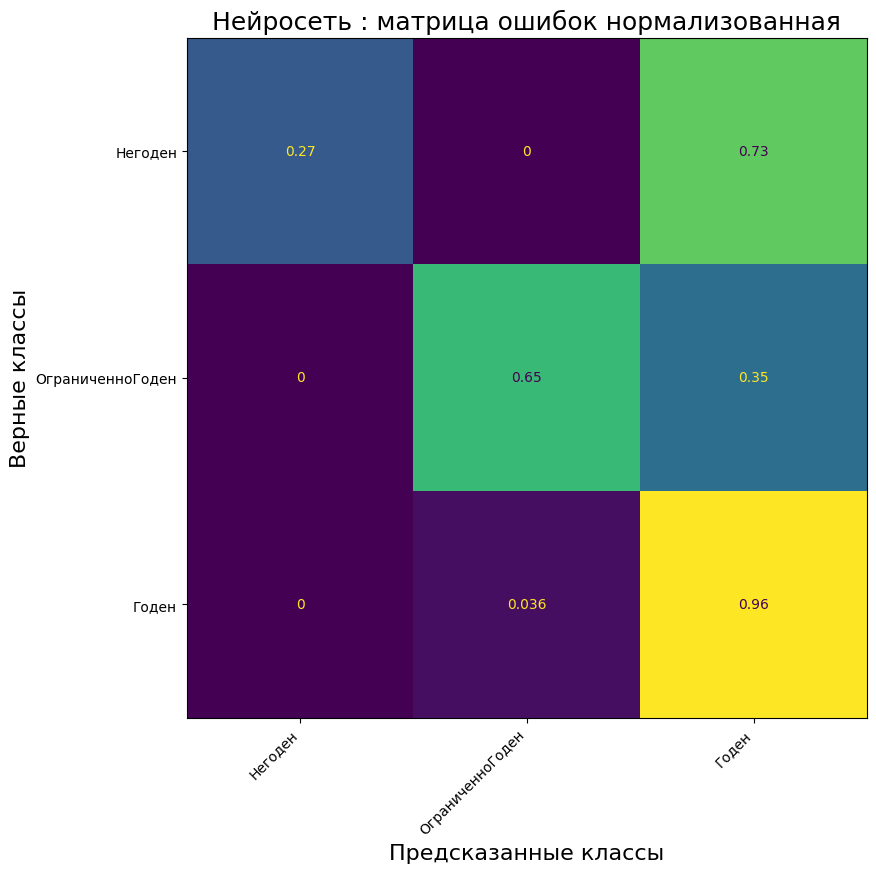

----------------------------------------------------------------------------------------------------
Нейросеть: 

Средняя точность распознавания:  63%


In [ ]:
eval_model(model_3, [x_train_harm_03, x_train_Diag_03], y_train_03, class_labels = CLASS_DICT)

In [ ]:
dffix7 = dffix2[['ЗаключениеМК',
'Вредность',
'Психиатрия Наркология1 Диагноз Представление1',
'Офтальмология1_ДиагнозПредставление1',
'Оториноларингология1_ДиагнозПредставление1',
'Гинекология1_ДиагнозПредставление1',
'Стоматология1_ДиагнозПредставление1',
'Дерматовенерология1_ДиагнозПредставление1',
'Неврология1_ДиагнозПредставление1',
'Терапия1_ДиагнозПредставление1',
'Хирургия1_ДиагнозПредставление1',
'Офтальмология1_ДиагнозПредставление2',
'Терапия2_ДиагнозПредставление1',
]]

In [ ]:
dffix7.columns.tolist()

['ЗаключениеМК',
 'Вредность',
 'Психиатрия Наркология1 Диагноз Представление1',
 'Офтальмология1_ДиагнозПредставление1',
 'Оториноларингология1_ДиагнозПредставление1',
 'Гинекология1_ДиагнозПредставление1',
 'Стоматология1_ДиагнозПредставление1',
 'Дерматовенерология1_ДиагнозПредставление1',
 'Неврология1_ДиагнозПредставление1',
 'Терапия1_ДиагнозПредставление1',
 'Хирургия1_ДиагнозПредставление1',
 'Офтальмология1_ДиагнозПредставление2',
 'Терапия2_ДиагнозПредставление1']

In [ ]:
print (dffix7.shape)
print (dffix7.shape[1])

(1571, 13)
13


In [ ]:
# заменяем значения в столбцах 2-13
dffix7['Психиатрия Наркология1 Диагноз Представление1'] = dffix7['Психиатрия Наркология1 Диагноз Представление1'].replace(['Общий медицинский осмотр'], np.NaN)
dffix7['Офтальмология1_ДиагнозПредставление1'] = dffix7['Офтальмология1_ДиагнозПредставление1'].replace(['Общий медицинский осмотр'], np.NaN)
dffix7['Оториноларингология1_ДиагнозПредставление1'] = dffix7['Оториноларингология1_ДиагнозПредставление1'].replace(['Общий медицинский осмотр'], np.NaN)
dffix7['Гинекология1_ДиагнозПредставление1'] = dffix7['Гинекология1_ДиагнозПредставление1'].replace(['Общий медицинский осмотр'], np.NaN)
dffix7['Стоматология1_ДиагнозПредставление1'] = dffix7['Стоматология1_ДиагнозПредставление1'].replace(['Общий медицинский осмотр'], np.NaN)
dffix7['Дерматовенерология1_ДиагнозПредставление1'] = dffix7['Дерматовенерология1_ДиагнозПредставление1'].replace(['Общий медицинский осмотр'], np.NaN)
dffix7['Неврология1_ДиагнозПредставление1'] = dffix7['Неврология1_ДиагнозПредставление1'].replace(['Общий медицинский осмотр'], np.NaN)
dffix7['Терапия1_ДиагнозПредставление1'] = dffix7['Терапия1_ДиагнозПредставление1'].replace(['Общий медицинский осмотр'], np.NaN)
dffix7['Хирургия1_ДиагнозПредставление1'] = dffix7['Хирургия1_ДиагнозПредставление1'].replace(['Общий медицинский осмотр'], np.NaN)
dffix7['Офтальмология1_ДиагнозПредставление2'] = dffix7['Офтальмология1_ДиагнозПредставление2'].replace(['Общий медицинский осмотр'], np.NaN)
dffix7['Терапия2_ДиагнозПредставление1'] = dffix7['Терапия2_ДиагнозПредставление1'].replace(['Общий медицинский осмотр'], np.NaN)

dffix8=dffix7.fillna('')
dffix8


<ipython-input-89-f5815caae9dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix7['Психиатрия Наркология1 Диагноз Представление1'] = dffix7['Психиатрия Наркология1 Диагноз Представление1'].replace(['Общий медицинский осмотр'], np.NaN)
<ipython-input-89-f5815caae9dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix7['Офтальмология1_ДиагнозПредставление1'] = dffix7['Офтальмология1_ДиагнозПредставление1'].replace(['Общий медицинский осмотр'], np.NaN)
<ipython-input-89-f5815caae9dc>:4: SettingWithCo

,ЗаключениеМК,Вредность,Психиатрия Наркология1 Диагноз Представление1,Офтальмология1_ДиагнозПредставление1,Оториноларингология1_ДиагнозПредставление1,Гинекология1_ДиагнозПредставление1,Стоматология1_ДиагнозПредставление1,Дерматовенерология1_ДиагнозПредставление1,Неврология1_ДиагнозПредставление1,Терапия1_ДиагнозПредставление1,Хирургия1_ДиагнозПредставление1,Офтальмология1_ДиагнозПредставление2,Терапия2_ДиагнозПредставление1
0,Годен,11.4,,,,,,,,,,,
1,Годен,4.2.5,,,,,,,,Гипертензивная [гипертоническая] болезнь с пре...,,,
2,ОграниченноГоден,4.2.5,,Миопия,,,,,,,,,
3,Годен,11.1,,,,,,,,,,,
4,ОграниченноГоден,11.1,,Астигматизм,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Годен,"4.4,4.5,6.1",,,,,,,,,,,
1962,Годен,4.4,,,,,,,,,,,
1972,Годен,3.1.8.2,,,,,,,,,,,
1973,Годен,"4.2.5,6.1",,,,,,,,,,,


In [ ]:
# Обобщенный диагноз
dffix8['Свод_Диагноз'] = (dffix8['Психиатрия Наркология1 Диагноз Представление1'].map(str) + ''
 + dffix8['Офтальмология1_ДиагнозПредставление1'].map(str)+ ''
 + dffix8['Оториноларингология1_ДиагнозПредставление1'].map(str)+ ''
 + dffix8['Гинекология1_ДиагнозПредставление1'].map(str)+ ''
 + dffix8['Стоматология1_ДиагнозПредставление1'].map(str)+ ''
 + dffix8['Дерматовенерология1_ДиагнозПредставление1'].map(str)+ ''
 + dffix8['Неврология1_ДиагнозПредставление1'].map(str)+ ''
 + dffix8['Терапия1_ДиагнозПредставление1'].map(str)+ ''
 + dffix8['Хирургия1_ДиагнозПредставление1'].map(str)+ ''
 + dffix8['Офтальмология1_ДиагнозПредставление2'].map(str)+ ''
 + dffix8['Терапия2_ДиагнозПредставление1'].map(str))

In [ ]:
dffix8_simple = dffix8[['ЗаключениеМК',
                        'Вредность',
                        'Свод_Диагноз',
]]

print (dffix8_simple.shape)
dffix8.to_excel('ppfix8.xlsx', index=False)
dffix8_simple

(1571, 3)


,ЗаключениеМК,Вредность,Свод_Диагноз
0,Годен,11.4,
1,Годен,4.2.5,Гипертензивная [гипертоническая] болезнь с пре...
2,ОграниченноГоден,4.2.5,Миопия
3,Годен,11.1,
4,ОграниченноГоден,11.1,Астигматизм
...,...,...,...
1961,Годен,"4.4,4.5,6.1",
1962,Годен,4.4,
1972,Годен,3.1.8.2,
1973,Годен,"4.2.5,6.1",


In [ ]:
# Настройка номеров столбцов

CLASS_DICT ={'Негоден':0, 'ОграниченноГоден':1, 'Годен':2}

COL_DIAG    = dffix8_simple.columns.get_loc('Свод_Диагноз')
COL_HARM   = dffix8_simple.columns.get_loc('Вредность')
CLASS_COUNT = dffix8_simple['ЗаключениеМК'].nunique()
CLASS_LIST = dffix8_simple.ЗаключениеМК.value_counts()
print (CLASS_LIST)

Годен               1434
ОграниченноГоден     126
Негоден               11
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_Diag = Tokenizer(num_words=1000, # объем словаря
                      filters='!"#$%&()**+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0''', # убираемые из текста ненужные символы 
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Пример текста о вредности и диагнозе
print(dffix8_simple.values[151])

['ОграниченноГоден' '11.1'
 'ГиперметропияПресбиакузисДругие хронические панкреатиты']


In [ ]:
# Извлечение текстов о сводном диагнозе для выборки
Diag_text_4 = extract_Diag_text(dffix8_simple.values) 

tokenizer_Diag.fit_on_texts(Diag_text_4)
items_Diag = list(tokenizer_Diag.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
Diag_seq_4 = tokenizer_Diag.texts_to_sequences(Diag_text_4)

# Преобразование последовательностей индексов в bag of words
x_train_Diag_04 = tokenizer_Diag.sequences_to_matrix(Diag_seq_4)

In [ ]:
# Пример текста пациенте
print(dffix8_simple.values[102])
print(Diag_text_4[102])

['Годен' '1.14.1,1.50' 'Лейомиома матки']
['Лейомиома матки']


In [ ]:
dffix8_simple.Свод_Диагноз.value_counts()

                                                                                                                           849
Миопия                                                                                                                     143
Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности    138
Астигматизм                                                                                                                 57
Гиперметропия                                                                                                               43
                                                                                                                          ... 
ГиперметропияХронический гастрит неуточненный                                                                                1
Последствия травм, захватывающих несколько областей тела                                                       

In [ ]:
dffix8_simple[dffix8_simple['Свод_Диагноз']!='']

,ЗаключениеМК,Вредность,Свод_Диагноз
1,Годен,4.2.5,Гипертензивная [гипертоническая] болезнь с пре...
2,ОграниченноГоден,4.2.5,Миопия
4,ОграниченноГоден,11.1,Астигматизм
5,Годен,11.1,АстигматизмАмблиопия вследствие анопсии
6,ОграниченноГоден,11.1,Миопия
...,...,...,...
1951,Годен,"1.2,1.37,1.48",Гиперметропия
1952,Годен,"1.48,1.37,1.2",Другие расстройства вегетативной [автономной] ...
1956,Годен,25,Другие хронические панкреатиты
1957,Годен,23,Гипертензивная [гипертоническая] болезнь с пре...


In [ ]:
# Извлечение текстов о сводном диагнозе для выборки
Diag_text_4 = extract_Diag_text(dffix8_simple.values) 

tokenizer_Diag.fit_on_texts(Diag_text_4)
items_Diag = list(tokenizer_Diag.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
Diag_seq_4 = tokenizer_Diag.texts_to_sequences(Diag_text_4)

# Преобразование последовательностей индексов в bag of words
x_train_Diag_04 = tokenizer_Diag.sequences_to_matrix(Diag_seq_4)

In [ ]:
# Пример текста пациенте
print(dffix8_simple.values[102])
print(Diag_text_4[102])

['Годен' '1.14.1,1.50' 'Лейомиома матки']
['Лейомиома матки']


In [ ]:
# Извлечение текстов о вредности для выборки
harm_text_4 = extract_harm_text(dffix8_simple.values) 

tokenizer_harm.fit_on_texts(harm_text_4)
items_harm = list(tokenizer_harm.word_index.items())

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq_4 = tokenizer_harm.texts_to_sequences(harm_text_4)

# Преобразование последовательностей индексов в bag of words
x_train_harm_04 = tokenizer_harm.sequences_to_matrix(harm_seq_4)

In [ ]:

y_list_key = list(dffix8_simple.ЗаключениеМК.values)
# print (CLASS_DICT.get(list(dffix7_simple.ЗаключениеМК.values)))
print (y_list_key)
# print (CLASS_DICT['Негоден'])
y_list = []
for CD in y_list_key:
  y_list.append(CLASS_DICT[CD])
print (y_list)

y_data_04 = np.array(y_list)            # Перевод общего списка меток класса в numpy-массив

y_train_04 = utils.to_categorical(y_data_04, CLASS_COUNT)

print (y_data_04[100])
print (y_train_04[100])

y = np.argmax(y_train_04, axis=-1)
print (y[100])


['Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'ОграниченноГоден', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'ОграниченноГоден', 'Годен', 'Годен', 'Годен', 'Годен', 'Годен', 'Огран

In [ ]:
input1 = Input((x_train_harm_04.shape[1],))
input2 = Input((x_train_Diag_04.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(92, activation="relu")(x1)
x1 = Dense(512, activation="relu")(x1)
x1 = Dropout(0.2)(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(128, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(75, activation="relu")(x2)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.3)(x2)
x2 = BatchNormalization()(x2)
x2 = Dense(128, activation="relu")(x2)

x = concatenate([x1, x2])             # Объединение 4 веток

x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.1)(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_4 = Model((input1, input2), x)

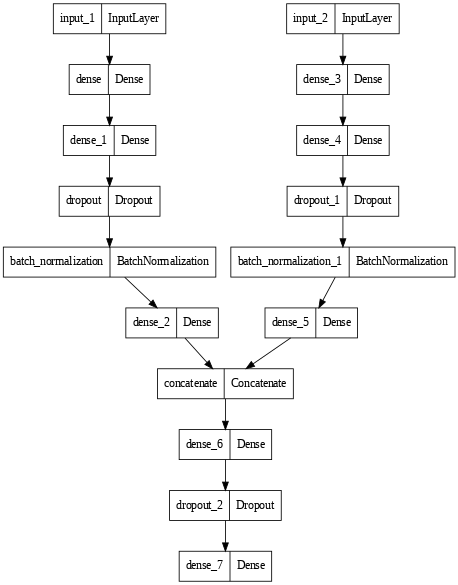

In [ ]:
utils.plot_model(model_4, dpi=60)

In [ ]:
model_4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3000)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 92)           276092      ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 75)           75075       ['input_2[0][0]']                
                                                                                              

Epoch 1/50
550/550 [==============================] - 11s 13ms/step - loss: 0.9716 - F1Score: 0.0847 - val_loss: 0.8742 - val_F1Score: 0.0333
Epoch 2/50
550/550 [==============================] - 11s 20ms/step - loss: 0.6509 - F1Score: 0.7765 - val_loss: 0.4010 - val_F1Score: 0.9301
Epoch 3/50
550/550 [==============================] - 11s 19ms/step - loss: 0.4602 - F1Score: 0.9039 - val_loss: 0.2770 - val_F1Score: 0.9301
Epoch 4/50
550/550 [==============================] - 12s 21ms/step - loss: 0.3733 - F1Score: 0.9054 - val_loss: 0.2434 - val_F1Score: 0.9301
Epoch 5/50
550/550 [==============================] - 11s 20ms/step - loss: 0.3323 - F1Score: 0.9054 - val_loss: 0.2349 - val_F1Score: 0.9301
Epoch 6/50
550/550 [==============================] - 10s 19ms/step - loss: 0.3203 - F1Score: 0.9054 - val_loss: 0.2358 - val_F1Score: 0.9301
Epoch 7/50
550/550 [==============================] - 11s 20ms/step - loss: 0.3011 - F1Score: 0.9054 - val_loss: 0.2347 - val_F1Score: 0.9301
Epoch 

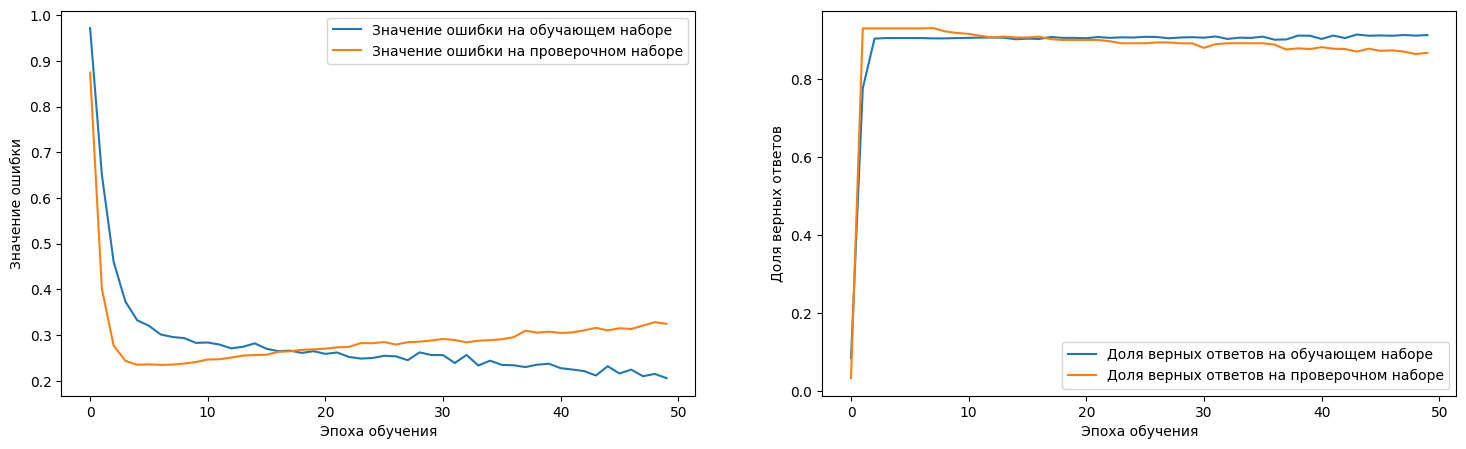

In [ ]:
model_4.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=[custum_metric])

history = model_4.fit([x_train_harm_04, x_train_Diag_04], 
                           y_train_04,
                           shuffle=True,
                           batch_size=2, 
                           epochs=50, 
                           validation_split=0.3,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['F1Score'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_F1Score'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
eval_net(model_4, [x_train_harm_04, x_train_Diag_04], 
                           y_train_04)

NameError: ignored

In [ ]:
n=388
y_pred = model_4.predict([x_train_harm_04, x_train_Diag_04])
print ('Предсказанный вектор: ', y_pred[n])
print ('Реальный вектор: ', y_train_04[n])

y = np.argmax(y_pred, axis=-1)
print ('Предсказанный класс: ', y[n])
print ('Реальный класс: ', y_data_04[n])

50/50 [==============================] - 1s 9ms/step
Предсказанный вектор:  [0.50484085 0.1321514  0.3630077 ]
Реальный вектор:  [1. 0. 0.]
Предсказанный класс:  0
Реальный класс:  0


In [ ]:
dffix8_simple[dffix8_simple['ЗаключениеМК'].isin(['Негоден'])]

,ЗаключениеМК,Вредность,Свод_Диагноз
177,Негоден,"18.2,18.1,1.1,1.39,1.50,4.3.2,5.1,11.1,11.3,11.4",Последствия травмы глаза и окологлазничной обл...
182,Негоден,"11.1,18.1",Гипертензивная [гипертоническая] болезнь с пре...
375,Негоден,"6.2,4.1,6.2,4.1",ГиперметропияОдносторонняя или неуточненная па...
388,Негоден,"4.1,6.2,18.1,18.2,4.1,6.2,18.1,18.2",Косоглазие неуточненноеГипертензивная [гиперто...
396,Негоден,"4.1,6.2,18.1,18.2,4.1,6.2,18.1,18.2",Косоглазие неуточненноеГипертензивная [гиперто...
479,Негоден,"1.14.2,1.23,3.1.7",МиопияСахарный диабет неуточненный с неуточнен...
978,Негоден,"4.4,6.1,11",Гипертензивная [гипертоническая] болезнь с пре...
1228,Негоден,"6.1,9,6.1,9",Гипертензивная [гипертоническая] болезнь с пре...
1752,Негоден,"1.50,4.3.2,4.4,18.1,18.2",ГиперметропияГипертензивная [гипертоническая] ...
1764,Негоден,"1.50,4.3.1,4.3.2,4.4,11.1,18",ГиперметропияГипертензивная [гипертоническая] ...


50/50 [==============================] - 0s 4ms/step


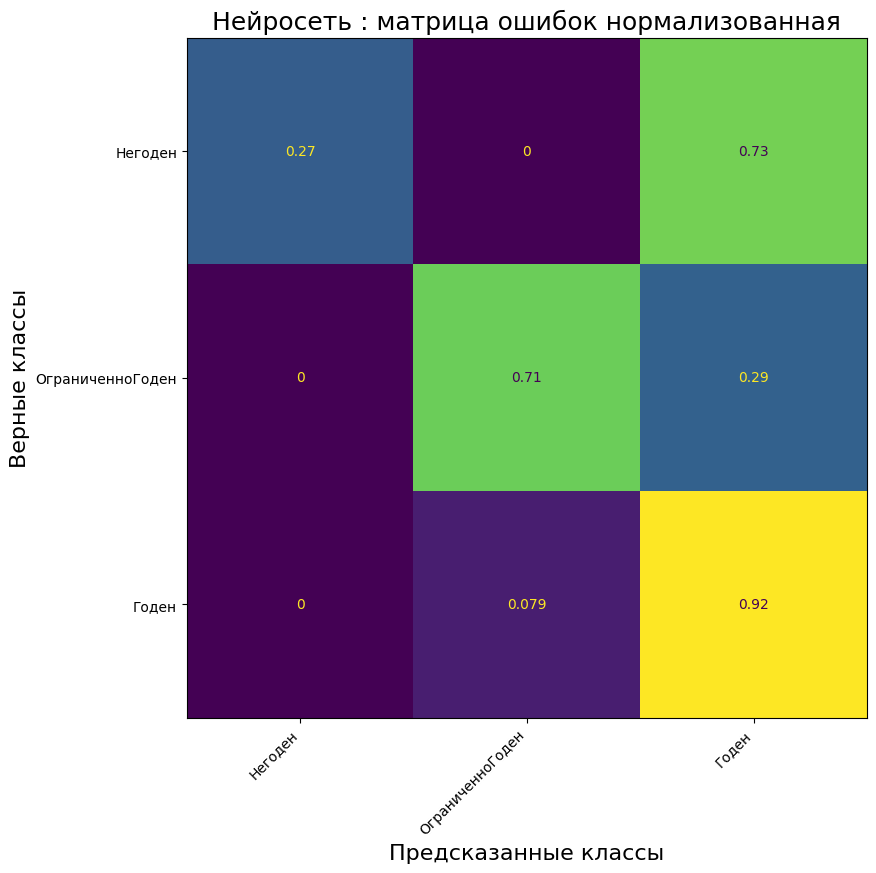

----------------------------------------------------------------------------------------------------
Нейросеть: 

Средняя точность распознавания:  64%


In [ ]:
eval_model(model_4, [x_train_harm_04, x_train_Diag_04], y_train_04, class_labels = CLASS_DICT)